In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])


# TODO: Add necessary transformations
# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(p = 0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(p = 0.5)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):

        x = x.view(-1, 28 * 28)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


model = Model()
print(model)

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
from torch.optim import SGD


criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.003)
losses_train = []
losses_valid = []


In [6]:
# TODO: Complete this code to implement Early stopping
patience = 20
min_delta = 0.001
best_loss = None
patience_counter = 0
num_epochs=500

train_subset, val_subset = torch.utils.data.random_split(train_set, [50000, 10000], generator=torch.Generator().manual_seed(1))

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

In [7]:
# Training loop with early stopping (with one layer model)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Training pass
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    losses_train.append(training_loss)
    validation_loss /= len(validation_loader)
    losses_valid.append(validation_loss)
    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!", best_loss)
            break

print("Training is finished!")

Epoch 1, Training Loss: 2.0523513748701703, Validation Loss: 1.5230310191014769
Epoch 2, Training Loss: 1.3015491874741594, Validation Loss: 0.8254197148760413
Epoch 3, Training Loss: 0.9317041723840018, Validation Loss: 0.6025584302130779
Epoch 4, Training Loss: 0.7732582307382941, Validation Loss: 0.5005864370021091
Epoch 5, Training Loss: 0.6826043187428131, Validation Loss: 0.442093050688695
Epoch 6, Training Loss: 0.6219001025088561, Validation Loss: 0.40211339456260586
Epoch 7, Training Loss: 0.5756160114873955, Validation Loss: 0.3732446806066355
Epoch 8, Training Loss: 0.541328346837304, Validation Loss: 0.3465114070731363
Epoch 9, Training Loss: 0.5171092541487232, Validation Loss: 0.32980433856226077
Epoch 10, Training Loss: 0.49494266360680433, Validation Loss: 0.3197869952222344
Epoch 11, Training Loss: 0.4722282908745666, Validation Loss: 0.30120235040878796
Epoch 12, Training Loss: 0.4518518214509177, Validation Loss: 0.28876002507794435
Epoch 13, Training Loss: 0.4379633

Epoch 101, Training Loss: 0.13852878608135208, Validation Loss: 0.06786038523694132
Epoch 102, Training Loss: 0.1371844060151085, Validation Loss: 0.06836266949873679
Epoch 103, Training Loss: 0.13904214897024225, Validation Loss: 0.06657004050145246
Epoch 104, Training Loss: 0.13699011132518238, Validation Loss: 0.06654847453787306
Epoch 105, Training Loss: 0.13421431095448574, Validation Loss: 0.06559496359591177
Epoch 106, Training Loss: 0.12967321536998186, Validation Loss: 0.06549865057822435
Epoch 107, Training Loss: 0.136231146638653, Validation Loss: 0.06551941877800473
Epoch 108, Training Loss: 0.13396959516332982, Validation Loss: 0.06465518615463642
Epoch 109, Training Loss: 0.13242400579972627, Validation Loss: 0.06359690712664015
Epoch 110, Training Loss: 0.1320389906015954, Validation Loss: 0.06321755709174047
Epoch 111, Training Loss: 0.13170754895019315, Validation Loss: 0.06372152668999354
Epoch 112, Training Loss: 0.12973940548604168, Validation Loss: 0.06100334584635

Epoch 199, Training Loss: 0.08879730522310905, Validation Loss: 0.03107602456525253
Epoch 200, Training Loss: 0.08597540349931891, Validation Loss: 0.030734151332627295
Epoch 201, Training Loss: 0.08622030548250942, Validation Loss: 0.02986671410020512
Epoch 202, Training Loss: 0.08637463618745046, Validation Loss: 0.029588873275692106
Epoch 203, Training Loss: 0.08685855508527791, Validation Loss: 0.030338876908140813
Epoch 204, Training Loss: 0.08294089241767488, Validation Loss: 0.028969780921233094
Epoch 205, Training Loss: 0.08478338356767255, Validation Loss: 0.02911739752577487
Epoch 206, Training Loss: 0.08179342005052355, Validation Loss: 0.028545245159325446
Epoch 207, Training Loss: 0.08259868250836108, Validation Loss: 0.028554905870718773
Epoch 208, Training Loss: 0.08150129266647196, Validation Loss: 0.02793811524441098
Epoch 209, Training Loss: 0.08079720431589273, Validation Loss: 0.02837281546163948
Epoch 210, Training Loss: 0.0804916457749649, Validation Loss: 0.02796

Epoch 297, Training Loss: 0.06216957399706994, Validation Loss: 0.01591071532557238
Epoch 298, Training Loss: 0.06250582854481919, Validation Loss: 0.015305448104560696
Epoch 299, Training Loss: 0.06373785094155479, Validation Loss: 0.016202621429989555
Epoch 300, Training Loss: 0.06248827168379408, Validation Loss: 0.016993281381630344
Epoch 301, Training Loss: 0.06191860833319464, Validation Loss: 0.016393713954136156
Epoch 302, Training Loss: 0.06225399794414449, Validation Loss: 0.015638595857919983
Epoch 303, Training Loss: 0.06272153653947116, Validation Loss: 0.015312251807665038
Epoch 304, Training Loss: 0.06113875634483755, Validation Loss: 0.015512017913015892
Epoch 305, Training Loss: 0.06188452527272517, Validation Loss: 0.01585080703182122
Epoch 306, Training Loss: 0.06061002374517479, Validation Loss: 0.015526902150054266
Epoch 307, Training Loss: 0.061375932662493624, Validation Loss: 0.01604773026528089
Epoch 308, Training Loss: 0.060921755855156384, Validation Loss: 0.

In [8]:
correct = 0
with torch.no_grad():
  for i in range(10000):
    yval = model.forward(test_set[i][0])
    if yval.argmax().item() == test_set[i][1] :
      correct +=1

print(model)
print(correct/10000)



Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
0.9811


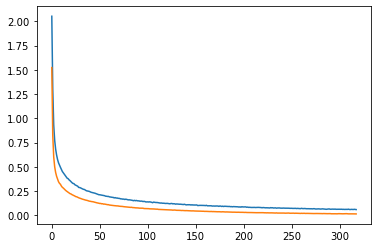

In [10]:
import matplotlib.pyplot as plt
num_epochs =318
plt.plot(range(num_epochs),losses_train,range(num_epochs),losses_valid)

In [2]:
!git clone https://github.com/Cusofayy/MNIST_elementary_neural_network.git

'git' is not recognized as an internal or external command,
operable program or batch file.
